In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp 
import stac
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("accuracies.csv", index_col=0)
data = np.asarray(df)


In [3]:
df.head(10)

,CNN-net,CNN_LSTM-net,ConvLSTM-net,Stacked_LSTM-net,Ensem-HAR
0,0.94,0.98,0.94,0.96,0.98
1,0.93,0.96,0.97,0.90,0.98
2,0.98,0.94,0.96,0.94,0.99
3,0.96,0.92,0.94,0.98,1.00
4,0.94,0.98,0.98,0.96,1.00
5,0.94,0.94,0.96,0.94,0.97
6,0.96,0.94,0.98,0.98,1.00
7,0.94,0.98,0.92,0.96,1.00
8,0.98,0.94,0.96,0.96,0.99
9,0.96,0.97,0.95,0.98,1.00


## Ranking accoridng to accuracy


In [4]:
rankings=np.empty([10,5])
for j in range(10):
    row=np.ravel(data[j:j+1])
    row_sort=np.sort(row)
    row_sort=row_sort[::-1]
    ranking=np.empty(5)
    list=[]
    count=0
    for i in range(1,6):
        if (row_sort[i-1] in list):
            continue
        list.append(row_sort[i-1])
        k=np.where(row==row_sort[i-1])[0]
        rank=float((count+1)+(count+len(k)))/2
        for pos in k:
            ranking[pos]=rank
        count+=len(k)
    rankings[j]=ranking

df_ranking=pd.DataFrame(rankings,columns=['CNN-net','CNN_LSTM-net','ConvLSTM-net','Stacked_LSTM-net','Ensem-HAR'])
#mean rank of each model for all sample datasets
avg_ranking=[]
for i in range(5):
    avg=np.average(rankings[:,i]) 
    avg_ranking.append(avg)


avg_ranking_modelwise=pd.DataFrame(avg_ranking,index =['CNN-net','CNN_LSTM-net','ConvLSTM-net','Stacked_LSTM-net','Ensem-HAR'],
               columns =['Mean Rank'])

In [5]:
df_ranking.head(10)

,CNN-net,CNN_LSTM-net,ConvLSTM-net,Stacked_LSTM-net,Ensem-HAR
0,4.5,1.5,4.5,3.0,1.5
1,4.0,3.0,2.0,5.0,1.0
2,2.0,4.5,3.0,4.5,1.0
3,3.0,5.0,4.0,2.0,1.0
4,5.0,2.5,2.5,4.0,1.0
5,4.0,4.0,2.0,4.0,1.0
6,4.0,5.0,2.5,2.5,1.0
7,4.0,2.0,5.0,3.0,1.0
8,2.0,5.0,3.5,3.5,1.0
9,4.0,3.0,5.0,2.0,1.0


In [6]:
avg_ranking_modelwise.head()

,Mean Rank
CNN-net,3.65
CNN_LSTM-net,3.55
ConvLSTM-net,3.40
Stacked_LSTM-net,3.35
Ensem-HAR,1.05


In [7]:
df_ranking.to_csv('ranking.csv')
avg_ranking_modelwise.to_csv('avg_ranking.csv')

In [102]:
# Helper functions for performing the statistical tests
def generate_scores(method, method_args, data, labels):
    pairwise_scores = method(data, **method_args) # Matrix for all pairwise comaprisons
    pairwise_scores.set_axis(labels, axis='columns', inplace=True) # Label the cols
    pairwise_scores.set_axis(labels, axis='rows', inplace=True) # Label the rows, note: same label as pairwise combinations
    return pairwise_scores

def plot(scores):
    # Pretty plot of significance
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'square': True,
                    'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

    sp.sign_plot(scores, **heatmap_args)

In [103]:
nemenyi_scores = generate_scores(sp.posthoc_nemenyi_friedman, {}, data, df.columns)

In [104]:
nemenyi_scores

,CNN-net,CNN_LSTM-net,ConvLSTM-net,Stacked_LSTM-net,Ensem-HAR
CNN-net,1.000000,0.900000,0.90000,0.900000,0.002198
CNN_LSTM-net,0.900000,1.000000,0.90000,0.900000,0.003729
ConvLSTM-net,0.900000,0.900000,1.00000,0.900000,0.007920
Stacked_LSTM-net,0.900000,0.900000,0.90000,1.000000,0.010068
Ensem-HAR,0.002198,0.003729,0.00792,0.010068,1.000000


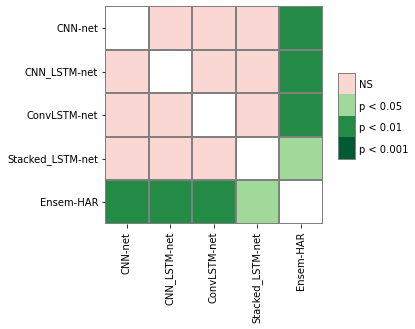

In [105]:
plot(nemenyi_scores)
